<a href="https://colab.research.google.com/github/suhanitatiya/sales_prediction/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Sales Performance Improvement Bootcamp**

###**Case study on: Sales Prediction and Optimization in Banking**

**Objective:**  **To Predict Future Sales Trends:** Enable to build predictive models for accurate sales forecasting, providing insights into future revenue trends.

* **Identify Key Sales Drivers:** Enables to uncover the most influential factors affecting sales performance, enhancing their understanding of critical success drivers.

* **Optimize Sales Strategies:** Helps to design data-driven sales strategies aimed at improving performance and meeting revenue targets, ensuring sustainable business growth in banking sales departments.

**Scope of the project:** The algorithms used are as follows:
* Linear Regression
* Decision Tree Regressor
* Random forest


**What is Sales prediction and optimization in banking?**

*
Sales prediction and optimization in banking is about using data to anticipate how much revenue a bank is likely to generate from its products and services over time. This involves analyzing **historical sales data, customer behaviors,** and **market trends** to forecast future sales. By predicting what might happen next, banks can plan more effectively and allocate resources in a way that maximizes their impact on revenue.

* Optimization takes these predictions further by finding the best ways to **achieve higher sales** and **improve business performance**.This might mean identifying the right customer segments, adjusting product pricing, or focusing on high-performing sales channels. Optimization helps banks to use their resources efficiently and target efforts where they are most likely to bring in positive results.

* Together, prediction and optimization empower banking professionals to make **better decisions, improve sales outcomes,** and ultimately drive growth.




We import all the necessary libraries as follows

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

We load the dataset. The data used in this analysis is taken from Kaggle dataset "E-Commerce Data - Actual transactions of UK retailer".

The dataset is loaded as folllows:

In [ ]:
df = pd.read_csv("/content/3. Sales Prediction and Optimization in Banking.csv", encoding="latin", dtype={'CustomerID': str})


To display all the data:

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


**Exploratory Data Analysis(EDA)**

* Exploratory Data Analysis EDA is the process of examining and understanding data by looking at patterns, trends, and relationships within it.

* It involves visualizing data with charts, graphs, and summaries to uncover insights and detect any issues or anomalies.

* EDA helps make sense of the data before building models or drawing conclusions. It’s a crucial first step in data analysis to guide informed decisions.









In [ ]:
df.describe()

,Quantity,UnitPrice
count,400753.000000,400752.000000
mean,9.796358,4.715680
std,174.919839,103.525052
min,-74215.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,11.000000,4.130000
max,74215.000000,38970.000000


* We see negative quantities and prices, and we can see that not all records have CustomerID data.

* We can also see that the majority of transactions are for quantities from 3 to 10 items, majority of items have prices up to 5 pounds.

* We have a bunch of huge outliers we will have to deal with later.

In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,object
Country,object


Every pandas dataframe has an attribute .dtypes which will help us understand what we currently have and what data has to be casted to correct types.

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.set_index('InvoiceDate')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom


###**Dealing with null values**


**Dealing with missing values.**

Normally if you encounter null values in the dataset you have to understand nature of those null values and possible impact they could have on the model.

There are few strategies that we can use to fix our issue with null values:

* delete rows with null values
* delete the feature with null values
* impute data with mean or median values or use another imputing strategy (method .fillna())

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1331
Quantity,0
UnitPrice,1
CustomerID,102755
Country,1


CustomerID has too many null values and this feature cannot predict a lot so we can just drop it.

It could be reasonable to create another feature "Amount of orders per customer".

In [ ]:
df = df.drop(columns=['CustomerID'])

In order to check out what kind of nulls we have in Description

In [ ]:
# to check out what kind of nulls we have in Description
df[df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2010-12-01 11:52:00,536414,22139,NaN,56,0.0,United Kingdom
2010-12-01 14:32:00,536545,21134,NaN,1,0.0,United Kingdom
2010-12-01 14:33:00,536546,22145,NaN,1,0.0,United Kingdom
2010-12-01 14:33:00,536547,37509,NaN,1,0.0,United Kingdom
2010-12-01 14:34:00,536549,85226A,NaN,1,0.0,United Kingdom


* The data in these rows is pretty strange as UnitPrice is 0, so these orders do not generate any sales.

* We can impute it with "UNKNOWN ITEM" at the moment and deal with those later during the analysis.

In [ ]:
df['Description'] = df['Description'].fillna('UNKNOWN ITEM')
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
UnitPrice,1
Country,1


**Checking out columns separately**
* It makes sense to go feature by feature and check what pitfalls we have in our data and also to understand our numbers better.

* Let's continue checking the Description column. Here we can see items that were bought most often.

In [ ]:
df['Description'].value_counts().head()

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1941
REGENCY CAKESTAND 3 TIER,1832
JUMBO BAG RED RETROSPOT,1761
PARTY BUNTING,1566
LUNCH BAG RED RETROSPOT,1381


Here we can see our best-selling products, items that appear in orders the most often.

###**Bar chart**
* A bar chart is a visual way to compare different amounts or categories by showing them as bars of different heights or lengths.

* Each bar represents a category, and the height (or length) shows the value or quantity for that category.

* It’s useful for quickly seeing which items are bigger or smaller compared to others. Bar charts make it easy to understand and compare data at a glance.


We will now create a bar chart in order to check which items were bought more often

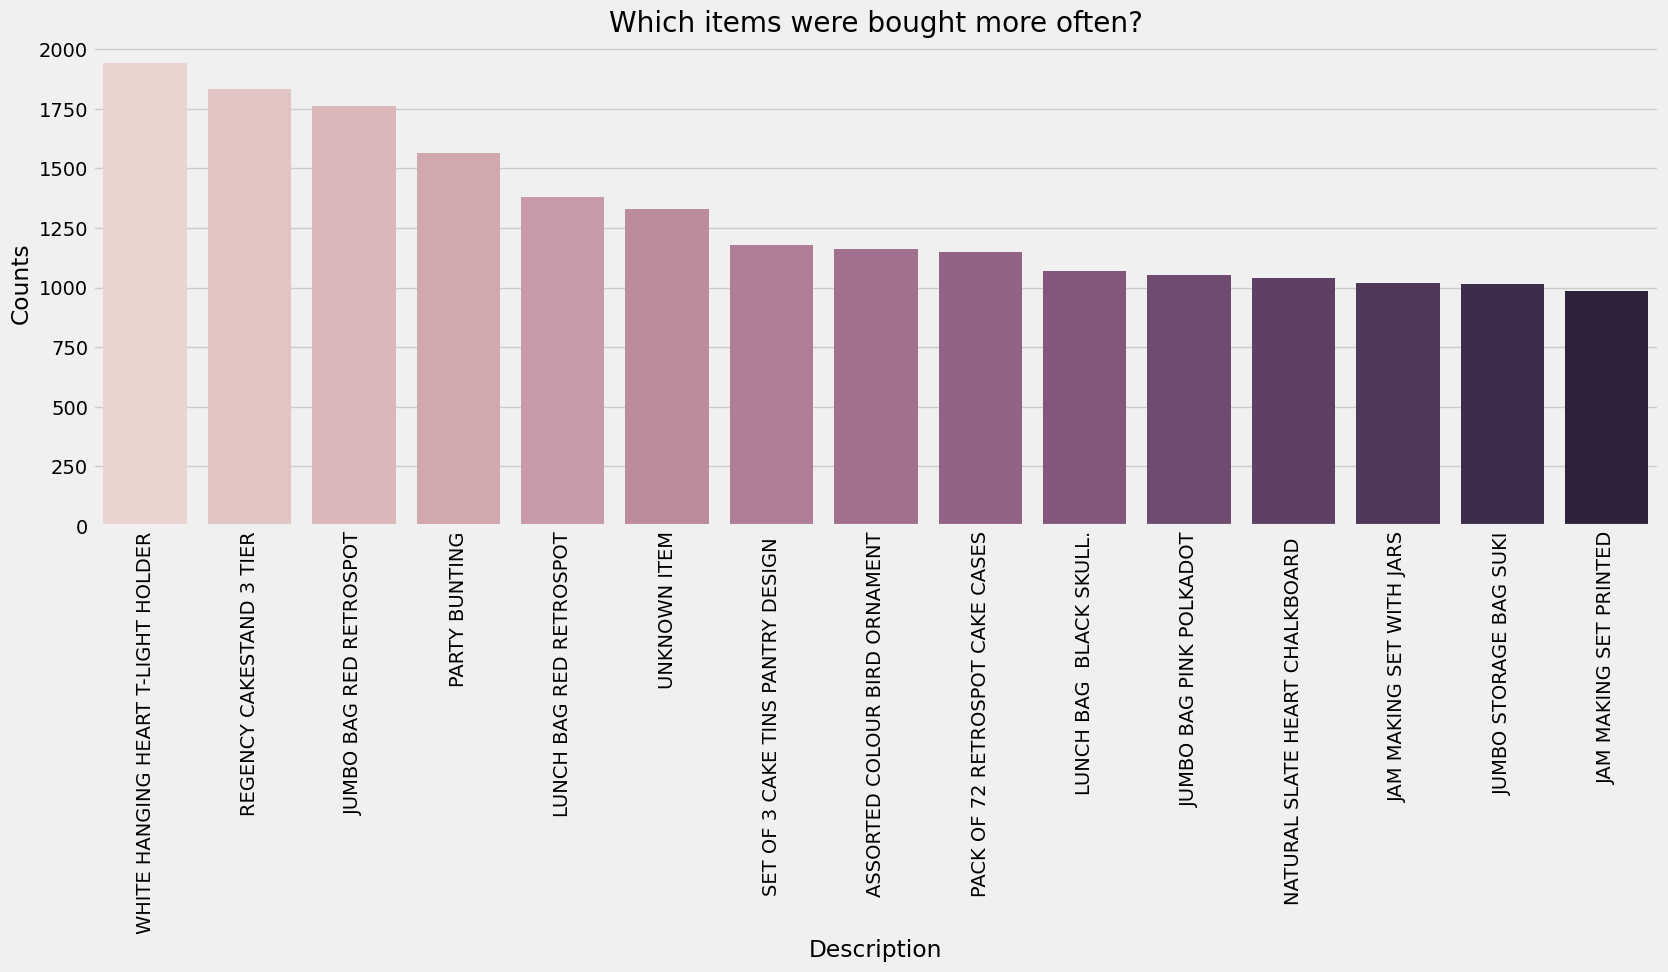

In [ ]:
# To check which items were bought more often?
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

In [ ]:
df['Description'].value_counts().tail()

,count
Description,
FBA,1
PEG BAG APPLE DESIGN,1
GREEN/BLUE CERAMIC CANDLE HOLDER,1
BLUE/YELLOW CERAMIC CANDLE HOLDER,1
VINTAGE ZINC PLANTER,1


We also notice from the above code that valid items are normally uppercase and non-valid or cancelations are in lowercase.

In [ ]:
df[~df['Description'].str.isupper()]['Description'].value_counts().head()

,count
Description,
Manual,450
BAG 125g SWIRLY MARBLES,203
3 TRADITIONAl BISCUIT CUTTERS SET,188
BAG 250g SWIRLY MARBLES,149
FRENCH BLUE METAL DOOR SIGN No,141


* A quick check of the case of letters in the Description says that there are some units with lowercase letters in their name and also that lowercase records are for canceled items.

* Here we can understand that data management in the store can be improved

To check the not full upper case items

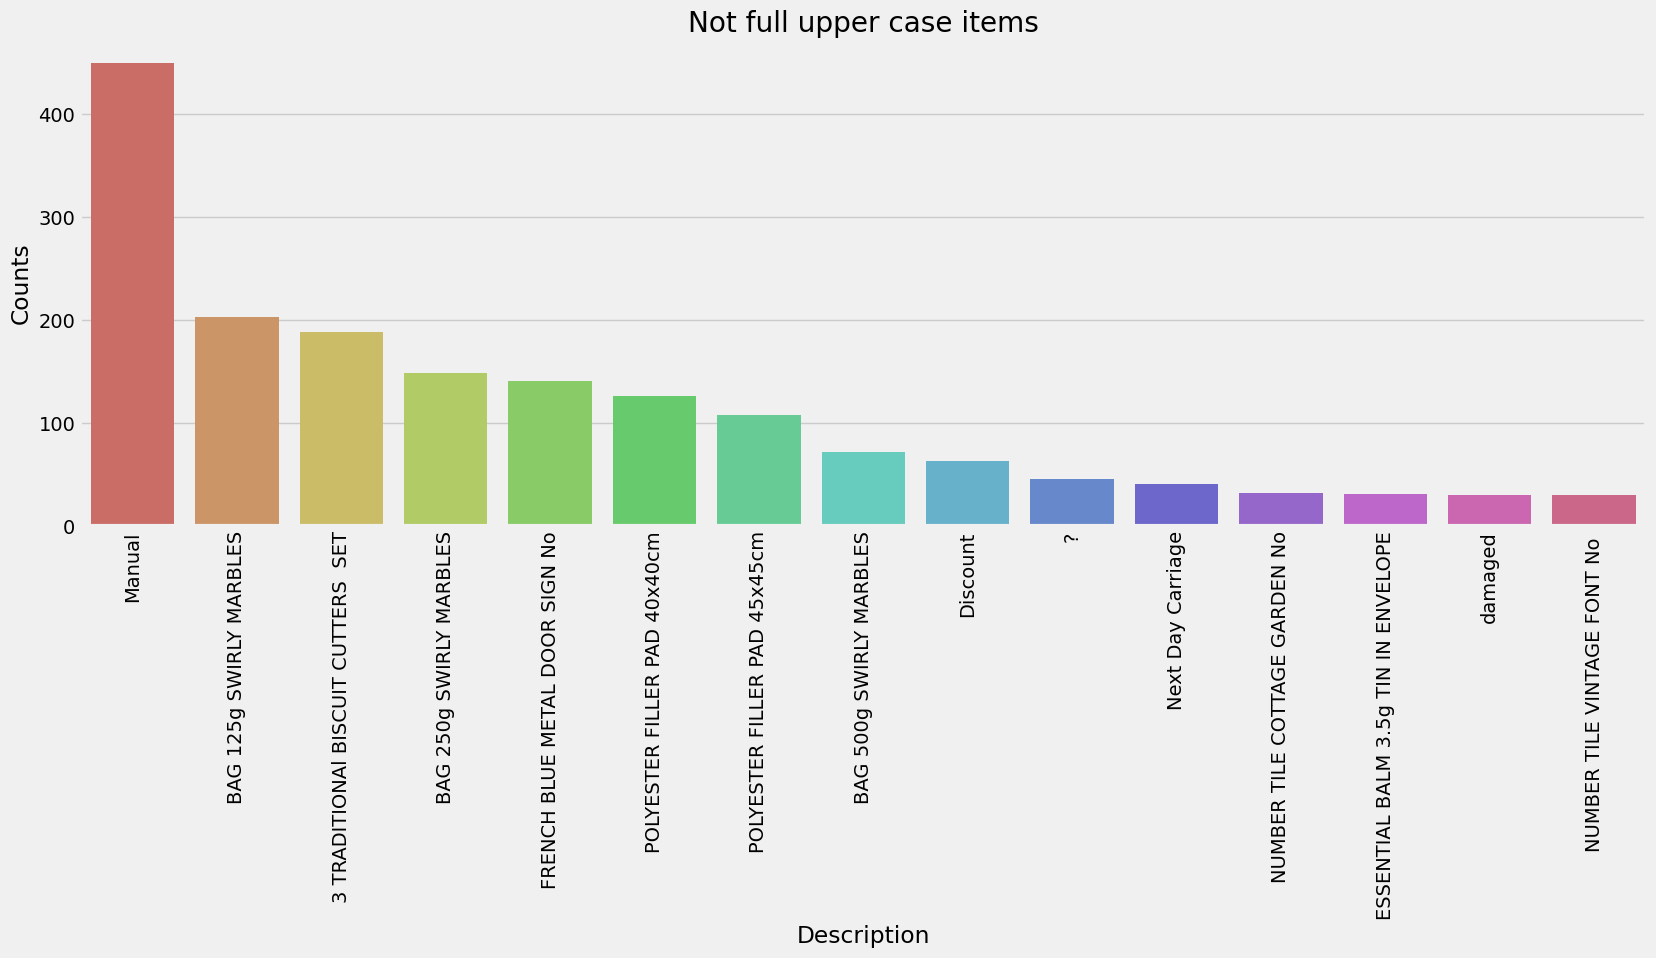

In [ ]:
# Not full upper case items
lcase_counts = df[~df['Description'].str.isupper()]['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=lcase_counts.index, y=lcase_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Counts")
plt.title("Not full upper case items");
plt.xticks(rotation=90);

Note: Checking out StockCode looks like they are deeply correlated with descriptions.

In [ ]:
df['StockCode'].value_counts().head()

,count
StockCode,
85123A,1893
22423,1835
85099B,1761
47566,1566
20725,1382


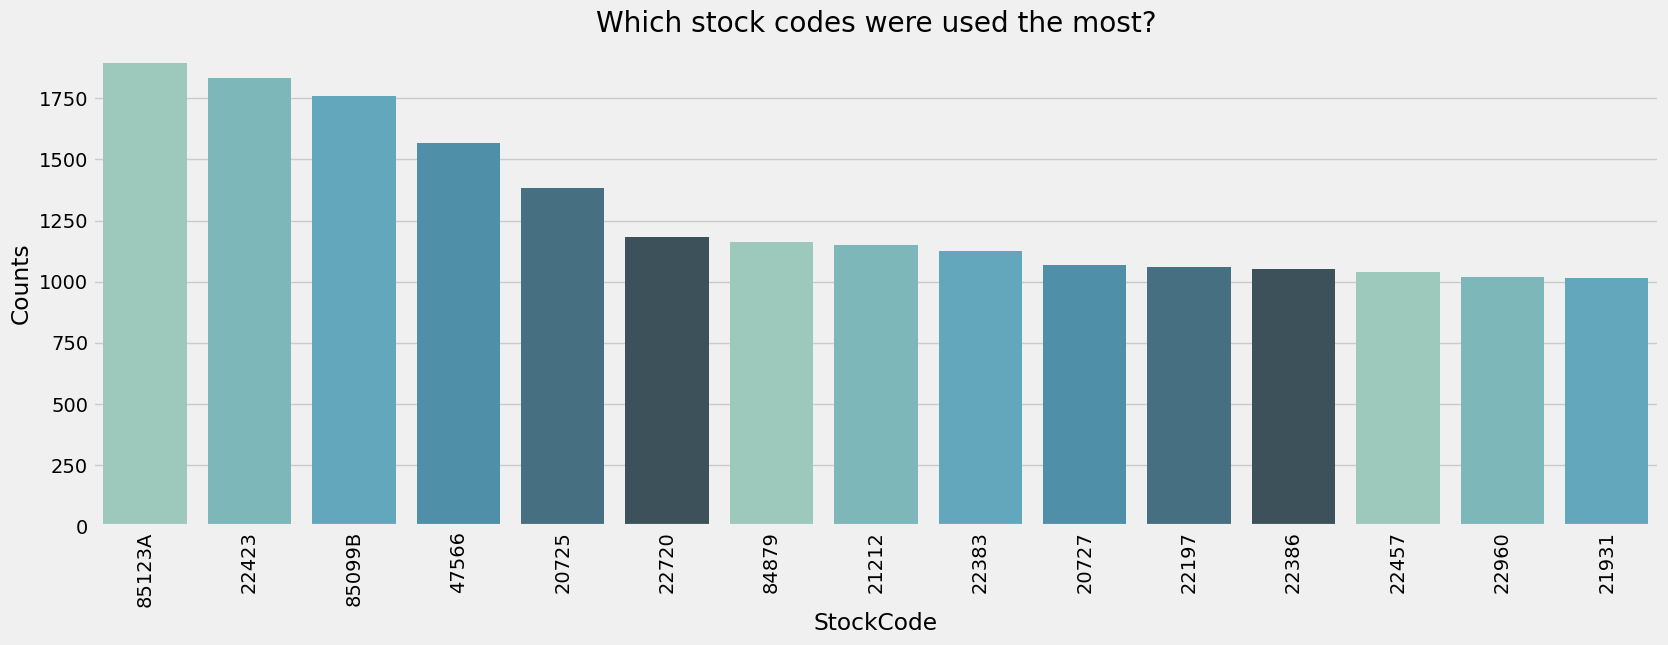

In [ ]:
# Which stock codes were used the most?
stock_counts = df['StockCode'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=stock_counts.index, y=stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?");
plt.xticks(rotation=90);

#####**Checking out InvoiceNo feature**

In [ ]:
df['InvoiceNo'].value_counts().tail()

,count
InvoiceNo,
560187,1
550954,1
565474,1
C560189,1
C546879,1


We check that which invoices had the most items?

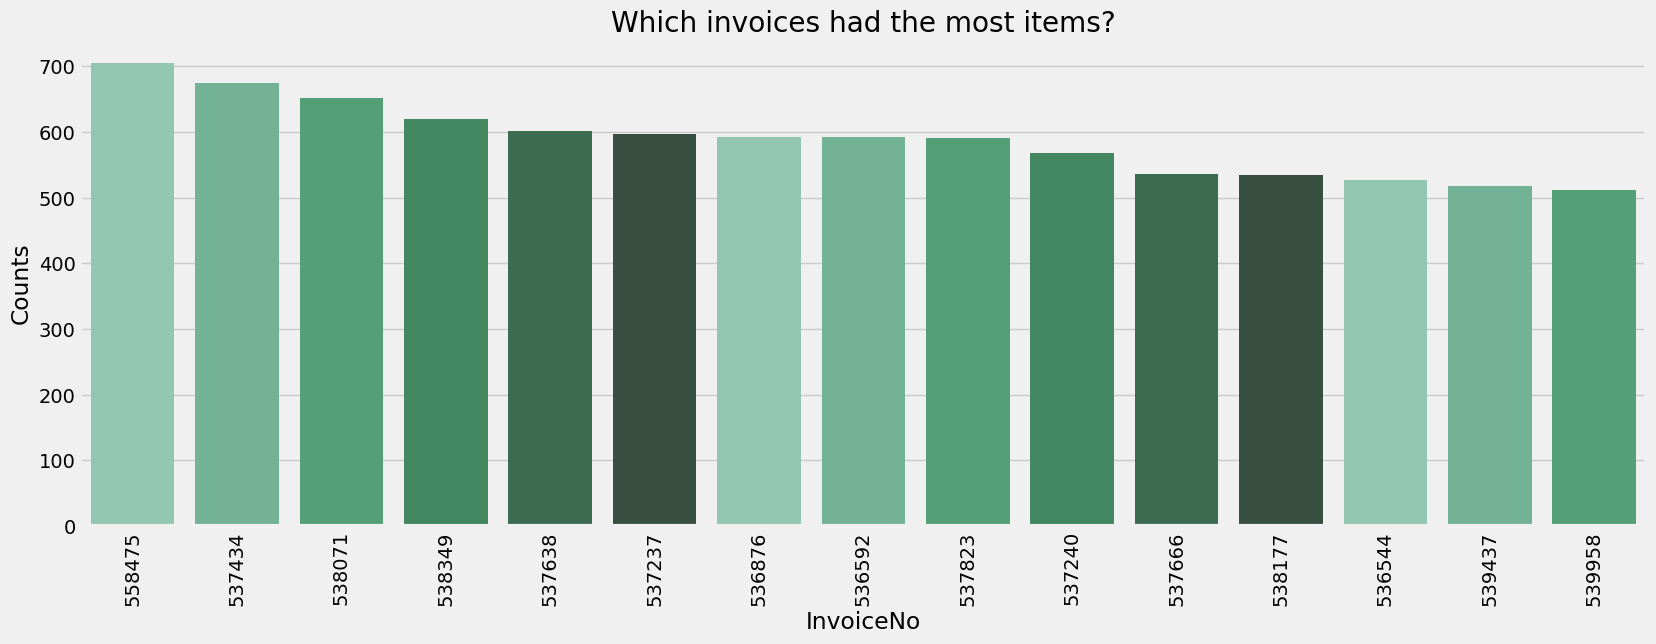

In [ ]:
#  Which invoices had the most items?
inv_counts = df['InvoiceNo'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=inv_counts.index, y=inv_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel("Counts")
plt.title("Which invoices had the most items?");
plt.xticks(rotation=90);

In [ ]:
df[df['InvoiceNo'].str.startswith('C')].describe()

,Quantity,UnitPrice
count,7438.000000,7438.000000
mean,-23.412208,48.929533
std,870.341937,684.847717
min,-74215.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,5.950000
max,-1.000000,38970.000000


* The Invoices that start with 'C' are the Canceling or Returning invoices. This resolves the mystery of negative quantities.





In [ ]:
df = df[~df['InvoiceNo'].str.startswith('C')]
df.describe()

,Quantity,UnitPrice
count,393315.000000,393314.000000
mean,10.424367,3.879547
std,129.735052,44.877634
min,-9600.000000,-11062.060000
25%,1.000000,1.250000
50%,4.000000,2.100000
75%,12.000000,4.130000
max,74215.000000,13541.330000


* During exploratory data analysis we can go back to the same operations and checks, just to understand how our actions affected the dataset.

* EDA is the series of repetitive tasks to understand better our data.

* Here, for example we get back to .describe() method to get an overall picture of our data after some manipulations.

* We still see negative quantities and negative prices, let's get into those records.

In [ ]:
# df[df['Quantity'] < 0]
df[df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2010-12-01 16:50:00,536589,21777,UNKNOWN ITEM,-10,0.0,United Kingdom
2010-12-02 14:42:00,536764,84952C,UNKNOWN ITEM,-38,0.0,United Kingdom
2010-12-03 15:30:00,536996,22712,UNKNOWN ITEM,-20,0.0,United Kingdom
2010-12-03 15:30:00,536997,22028,UNKNOWN ITEM,-20,0.0,United Kingdom
2010-12-03 15:30:00,536998,85067,UNKNOWN ITEM,-6,0.0,United Kingdom


Here we can see that other "Negative quantities" appear to be damaged/lost/unknown items.
Again, we will just ignore them for the sake of simplicity of analysis for this project.

In [ ]:
df = df[df['Quantity'] > 0]
df.describe()

,Quantity,UnitPrice
count,392222.000000,392221.000000
mean,10.865150,3.890358
std,125.524806,44.939652
min,1.000000,-11062.060000
25%,1.000000,1.250000
50%,4.000000,2.100000
75%,12.000000,4.130000
max,74215.000000,13541.330000


We also see negative UnitPrice, which is not normal as well.
Let's check this out:

In [ ]:
df[df['UnitPrice'] < 0].describe()

,Quantity,UnitPrice
count,2.0,2.00
mean,1.0,-11062.06
std,0.0,0.00
min,1.0,-11062.06
25%,1.0,-11062.06
50%,1.0,-11062.06
75%,1.0,-11062.06
max,1.0,-11062.06


In [ ]:
df[df['UnitPrice'] == -11062.06]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2011-08-12 14:51:00,A563186,B,Adjust bad debt,1,-11062.06,United Kingdom
2011-08-12 14:52:00,A563187,B,Adjust bad debt,1,-11062.06,United Kingdom


As there are just two rows, let's ignore them for the moment (the description gives us enough warnings, although we still need some context to understand it better)

In [ ]:
df = df[df['UnitPrice'] > 0]
df.describe()

,Quantity,UnitPrice
count,391236.000000,391236.000000
mean,10.759294,3.956702
std,124.806526,37.398144
min,1.000000,0.001000
25%,1.000000,1.250000
50%,4.000000,2.100000
75%,12.000000,4.130000
max,74215.000000,13541.330000


As we have finished cleaning our data and removed all suspicious records we can start creating some new features for our model.
Let's start with the most obvious one - Sales.
We have quantities, we have prices - we can calculate the revenue.

###**Visual EDA**

* Visual Exploratory Data Analysis (EDA) is a process of using graphs and charts to understand patterns, trends, and relationships in a dataset.

* It helps quickly spot anomalies, see how variables relate, and summarize the data’s key features visually.

* Visual EDA is a great way to get a first impression of the data before doing deeper analysis or building models.

* It makes complex data easier to interpret and communicate.

([0], [Text(0, 0, 'United Kingdom')])

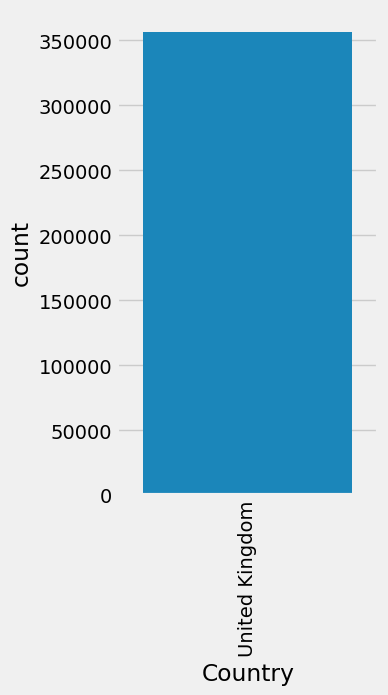

In [ ]:
plt.figure(figsize=(3,6))
sns.countplot(x=df[df['Country'] == 'United Kingdom']['Country'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'France'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Netherlands'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Norway'),
  Text(5, 0, 'EIRE'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Poland'),
  Text(9, 0, 'Portugal'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Belgium'),
  Text(12, 0, 'Lithuania'),
  Text(13, 0, 'Japan'),
  Text(14, 0, 'Iceland'),
  Text(15, 0, 'Channel Islands'),
  Text(16, 0, 'Denmark'),
  Text(17, 0, 'Cyprus'),
  Text(18, 0, 'Sweden'),
  Text(19, 0, 'Finland'),
  Text(20, 0, 'Austria'),
  Text(21, 0, 'Bahrain'),
  Text(22, 0, 'Israel'),
  Text(23, 0, 'Greece'),
  Text(24, 0, 'Hong Kong'),
  Text(25, 0, 'Singapore'),
  Text(26, 0, 'Lebanon'),
  Text(27, 0, 'United Arab Emirates'),
  Text(28, 0, 'Saudi Arabia'),
  Text(29, 0, 'C

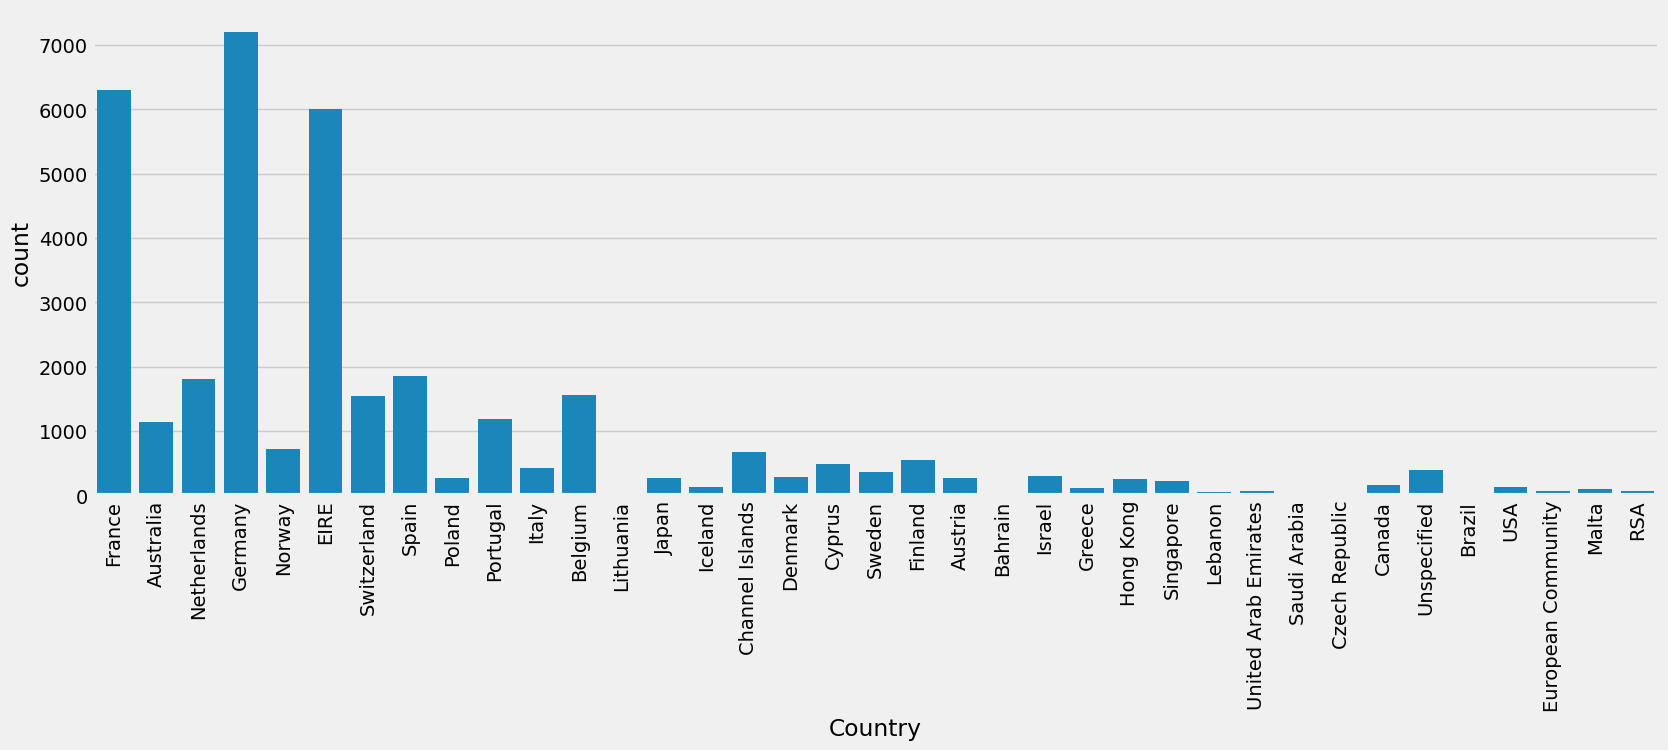

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x=df[df['Country'] != 'United Kingdom']['Country'])
plt.xticks(rotation=90)

In [ ]:
uk_count = df[df['Country'] == 'United Kingdom']['Country'].count()
all_count = df['Country'].count()
uk_perc = uk_count/all_count
print(str('{0:.2f}%').format(uk_perc*100))

91.06%


From the above plots and calculations, we can see that the vast majority of sales were made in the UK and just 8.49% went abroad.
We can say our dataset is skewed to the UK side.

###**Detecting outliers**

There are a few different methods to detect outliers:

1. Box plots
2. Using IQR
3. Scatter plot also works in some cases (and this is one of those)


* Detecting outliers using a scatter plot is pretty intuitive. You plot your data and remove data points that visually are definitely out of range. Like in the chart below

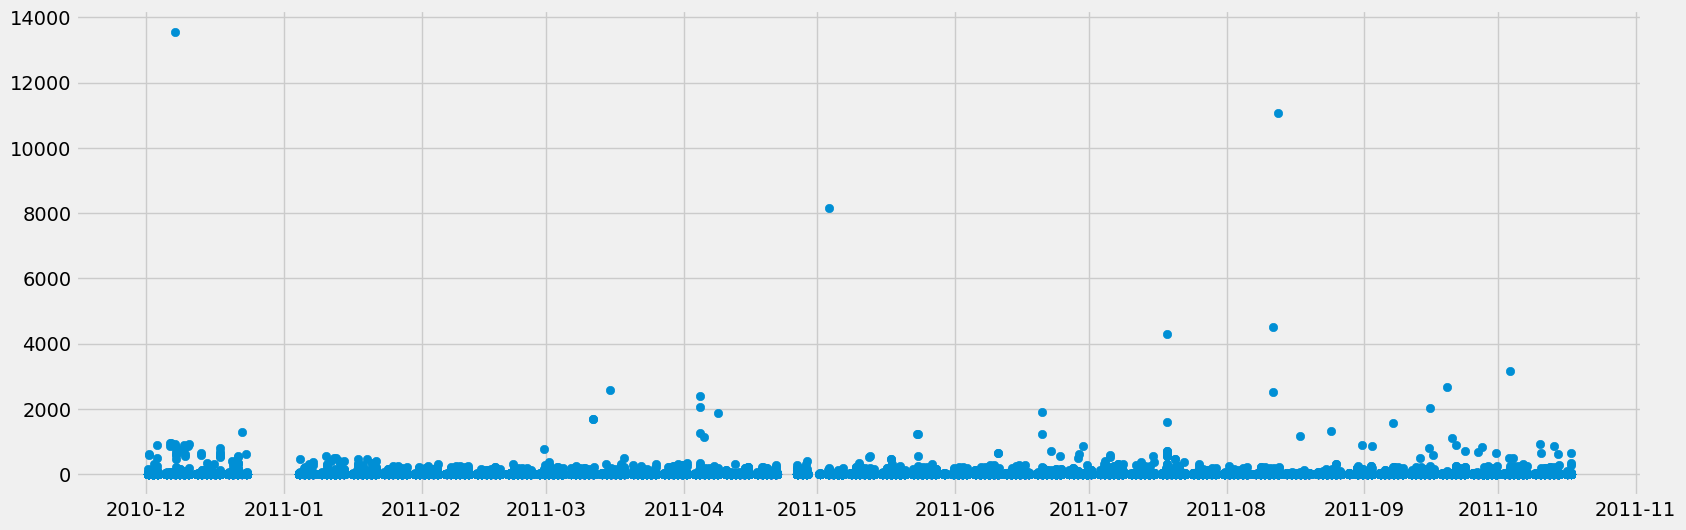

In [ ]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['UnitPrice'])

###**Removing obvious outliers**

(array([14944., 14975., 15006., 15034., 15065., 15095., 15126., 15156.,
        15187., 15218., 15248., 15279.]),
 [Text(14944.0, 0, '2010-12'),
  Text(14975.0, 0, '2011-01'),
  Text(15006.0, 0, '2011-02'),
  Text(15034.0, 0, '2011-03'),
  Text(15065.0, 0, '2011-04'),
  Text(15095.0, 0, '2011-05'),
  Text(15126.0, 0, '2011-06'),
  Text(15156.0, 0, '2011-07'),
  Text(15187.0, 0, '2011-08'),
  Text(15218.0, 0, '2011-09'),
  Text(15248.0, 0, '2011-10'),
  Text(15279.0, 0, '2011-11')])

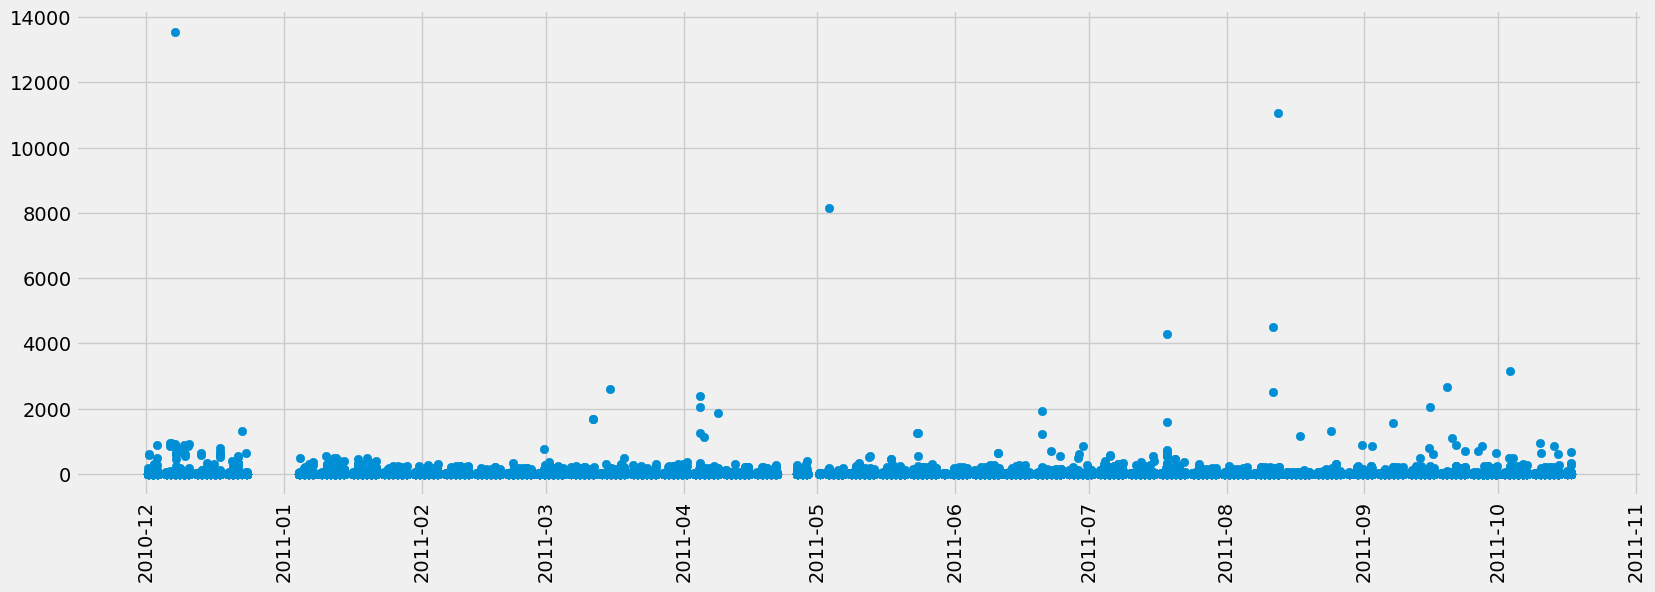

In [ ]:
df = df[df['UnitPrice'] < 25000]
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['UnitPrice'])
plt.xticks(rotation=90)

###**Visually checking distribution of numeric features**

(array([14944., 14975., 15006., 15034., 15065., 15095., 15126., 15156.,
        15187., 15218., 15248., 15279.]),
 [Text(14944.0, 0, '2010-12'),
  Text(14975.0, 0, '2011-01'),
  Text(15006.0, 0, '2011-02'),
  Text(15034.0, 0, '2011-03'),
  Text(15065.0, 0, '2011-04'),
  Text(15095.0, 0, '2011-05'),
  Text(15126.0, 0, '2011-06'),
  Text(15156.0, 0, '2011-07'),
  Text(15187.0, 0, '2011-08'),
  Text(15218.0, 0, '2011-09'),
  Text(15248.0, 0, '2011-10'),
  Text(15279.0, 0, '2011-11')])

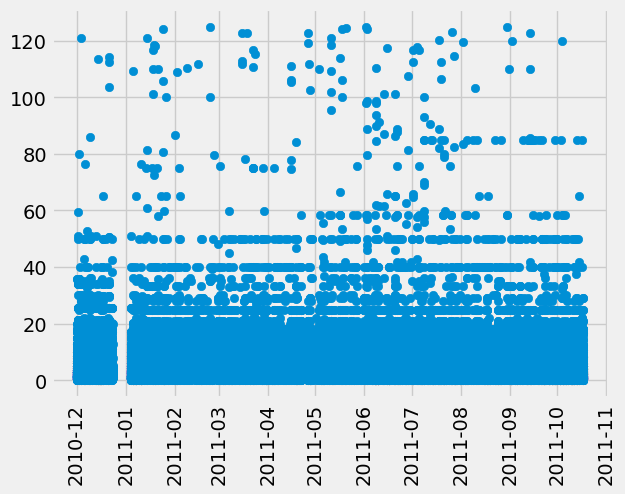

In [ ]:
df_quantile = df[df['UnitPrice'] < 125]
plt.scatter(x=df_quantile.index, y=df_quantile['UnitPrice'])
plt.xticks(rotation=90)

After removing obvious outliers we still see some values that are out of normal distribution.

In [ ]:
df.describe()

,Quantity,UnitPrice
count,391236.000000,391236.000000
mean,10.759294,3.956702
std,124.806526,37.398144
min,1.000000,0.001000
25%,1.000000,1.250000
50%,4.000000,2.100000
75%,12.000000,4.130000
max,74215.000000,13541.330000


###**Visually checking distribution of numeric features**


Visual EDA (Exploratory Data Analysis) is the process of using graphs like histograms, scatter plots, and box plots to understand data patterns, spot trends, and identify outliers quickly. It helps in getting a clear, visual sense of the data before deeper analysis.

<Axes: ylabel='Density'>

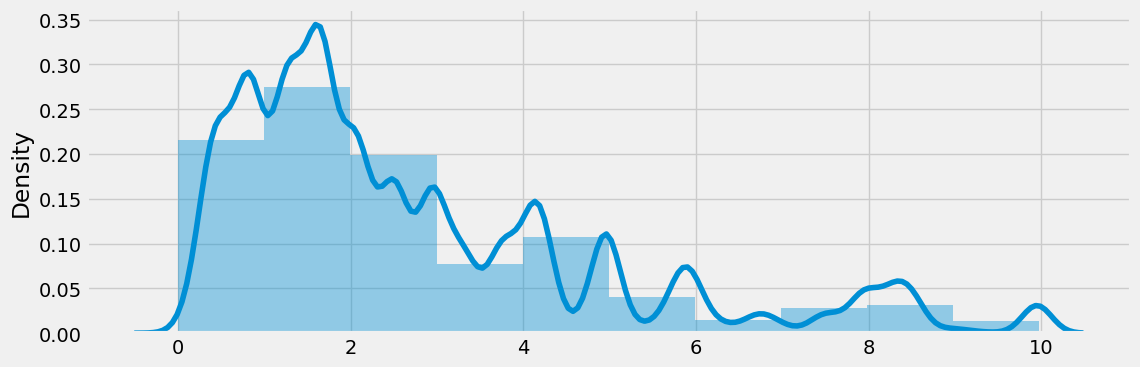

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 10]['UnitPrice'].values, kde=True, bins=10)

<Axes: ylabel='Density'>

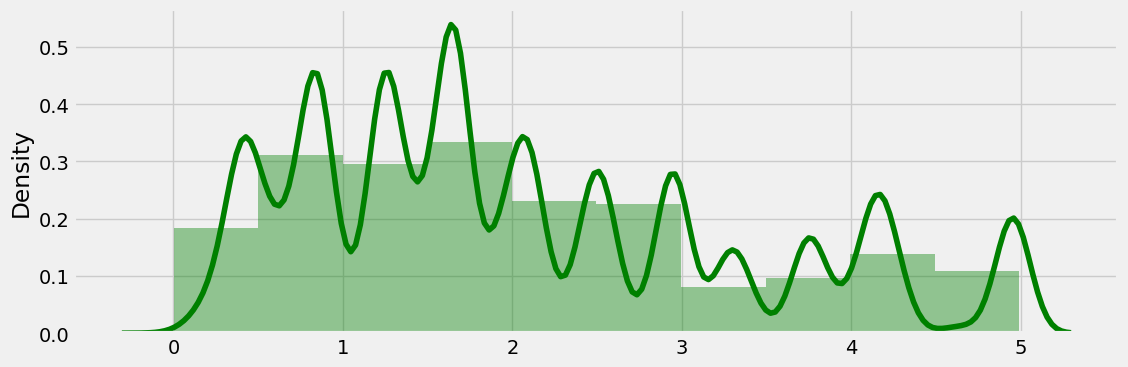

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 5]['UnitPrice'].values, kde=True, bins=10, color='green')

From these histograms, we can see that the vast majority of items sold in this store have a low price range - 0 to 3 pounds.

<Axes: xlabel='Quantity', ylabel='Density'>

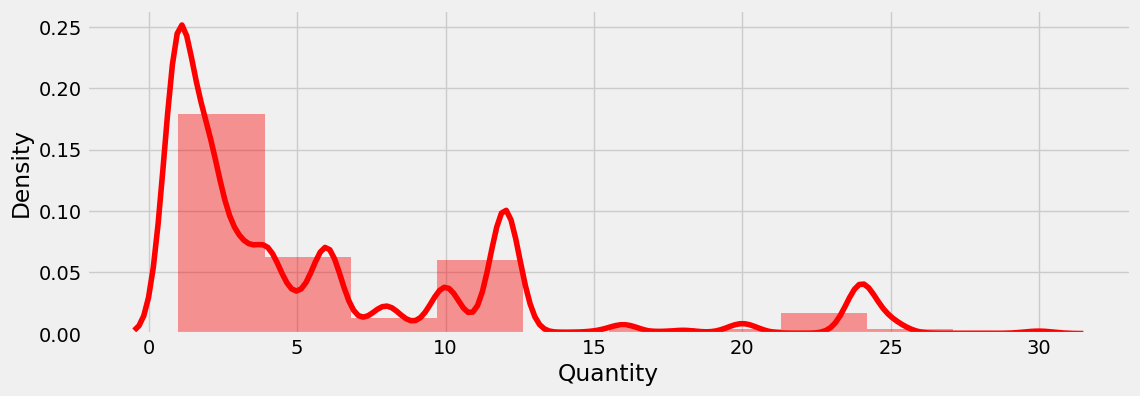

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 30]['Quantity'], kde=True, bins=10, color='red')

<Axes: xlabel='Quantity', ylabel='Density'>

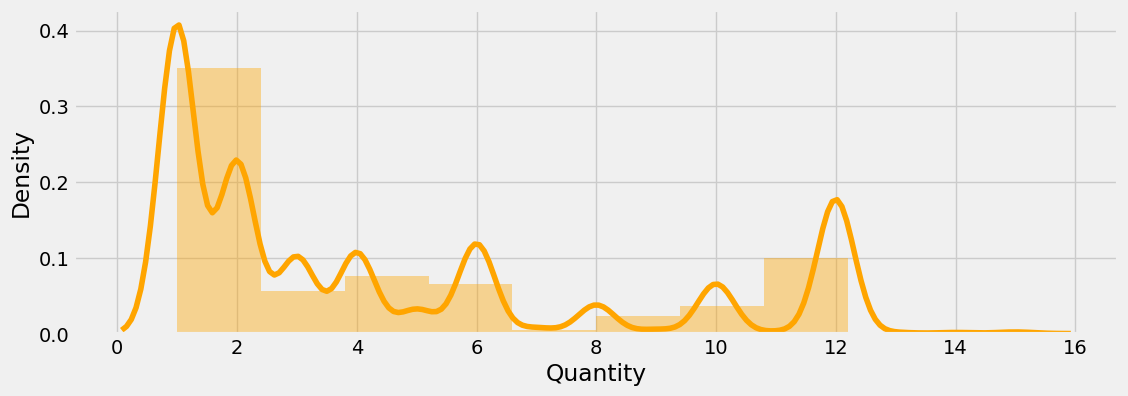

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 15]['Quantity'], kde=True, bins=10, color='orange')

From these histograms we that people bought normally 1-5 items or 10-12
Maybe there was some kind of offers for sets?

<Axes: xlabel='UnitPrice', ylabel='Density'>

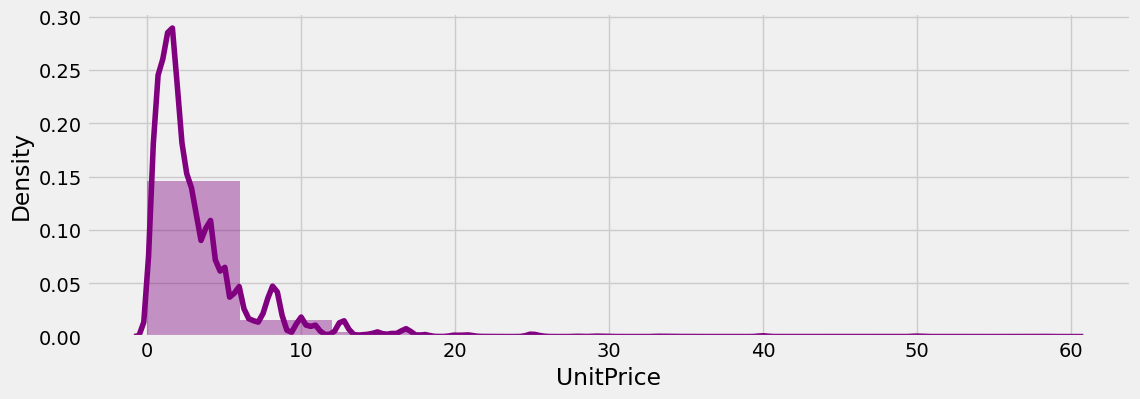

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 60]['UnitPrice'], kde=True, bins=10, color='purple')

<Axes: xlabel='UnitPrice', ylabel='Density'>

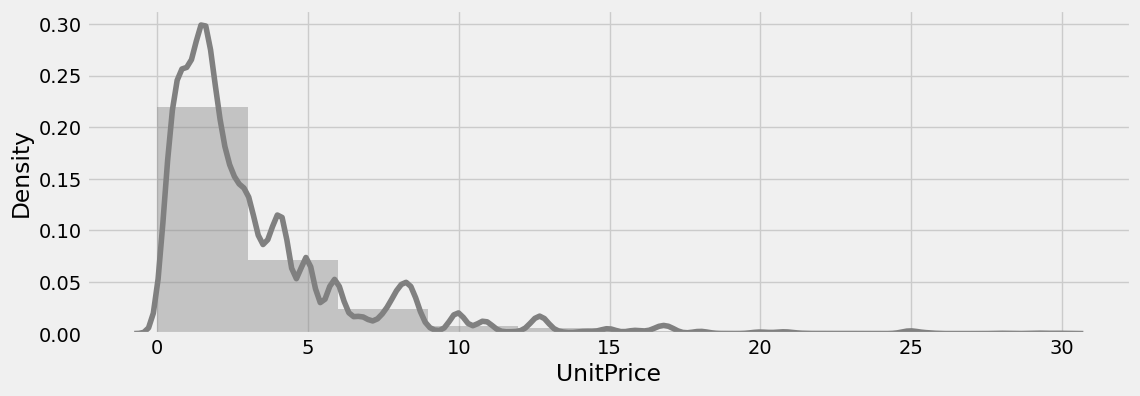

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 30]['UnitPrice'], kde=True, bins=10, color='grey')

From these histograms, we can understand that majority of sales per order were in the range 1-15 pounds each.

###**Analysing sales over time**

In [ ]:
df_ts = df[['UnitPrice']]
df_ts.head()

,UnitPrice
InvoiceDate,
2010-12-01 08:26:00,2.55
2010-12-01 08:26:00,3.39
2010-12-01 08:26:00,2.75
2010-12-01 08:26:00,3.39
2010-12-01 08:26:00,3.39


* As we can see every invoice has its own timestamp (definitely based on the time the order was made).

* We can resample time data by, for example, weeks, and try to see if there are any patterns in our sales.

<Axes: xlabel='InvoiceDate'>

<Figure size 1800x600 with 0 Axes>

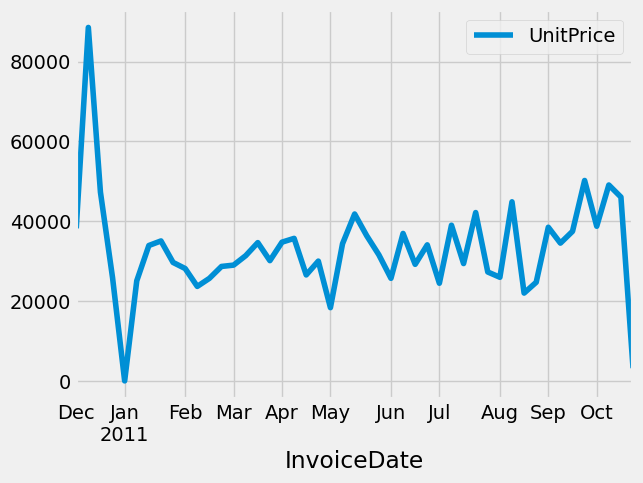

In [ ]:
plt.figure(figsize=(18,6))
df_resample = df_ts.resample('W').sum()
df_resample.plot()

Note : That week with 0 sales in January looks suspicious, let's check it closer.

In [ ]:
df_resample['12-2010':'01-2011']

,UnitPrice
InvoiceDate,
2010-12-05,38224.49
2010-12-12,88540.65
2010-12-19,47278.94
2010-12-26,25860.39
2011-01-02,0.00
2011-01-09,25072.03
2011-01-16,33919.09
2011-01-23,35064.34
2011-01-30,29676.45


Now it makes sense: possibly, during the New Year holidays period the store was closed and didn't process orders, that's why they didn't make any sales.

###**Preparing data for modeling and feature creation**

Now comes the most fun part of the project - building a model.

To do this we will need to create a few more additional features to make our model more sophisticated.

In [ ]:
df_clean = df[df['UnitPrice'] < 15]
df_clean.describe()

,Quantity,UnitPrice
count,383827.000000,383827.000000
mean,10.935117,3.017134
std,125.998123,2.694858
min,1.000000,0.001000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,12.000000,4.130000
max,74215.000000,14.960000


In [ ]:
df_clean.index

DatetimeIndex(['2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:28:00',
               '2010-12-01 08:28:00', '2010-12-01 08:34:00',
               ...
               '2011-10-17 11:51:00', '2011-10-17 11:51:00',
               '2011-10-17 11:51:00', '2011-10-17 11:51:00',
               '2011-10-17 11:51:00', '2011-10-17 11:51:00',
               '2011-10-17 11:51:00', '2011-10-17 11:51:00',
               '2011-10-17 11:51:00', '2011-10-17 11:51:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=383827, freq=None)

#####**Quantity per invoice feature**

A feature that could influence the sales output could be "Quantity per invoice". Let's find the data for this feature.

In [ ]:
df_join = df_clean.groupby('InvoiceNo')[['Quantity']].sum()

In [ ]:
df_join = df_join.reset_index()
df_join.head()

,InvoiceNo,Quantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3


In [ ]:
df_clean['InvoiceDate'] = df_clean.index
df_clean = df_clean.merge(df_join, how='left', on='InvoiceNo')
df_clean = df_clean.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityInv'})
df_clean.tail(15)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,InvoiceDate,QuantityInv
383812,571352,22112,CHOCOLATE HOT WATER BOTTLE,3,4.95,United Kingdom,2011-10-17 11:49:00,33
383813,571352,22835,HOT WATER BOTTLE I AM SO POORLY,2,4.95,United Kingdom,2011-10-17 11:49:00,33
383814,571352,22623,BOX OF VINTAGE JIGSAW BLOCKS,5,5.95,United Kingdom,2011-10-17 11:49:00,33
383815,571352,22622,BOX OF VINTAGE ALPHABET BLOCKS,6,11.95,United Kingdom,2011-10-17 11:49:00,33
383816,571352,21912,VINTAGE SNAKES & LADDERS,2,3.75,United Kingdom,2011-10-17 11:49:00,33
383817,571360,85179A,GREEN BITTY LIGHT CHAIN,12,1.25,United Kingdom,2011-10-17 11:51:00,322
383818,571360,85179C,PINK BITTY LIGHT CHAIN,24,1.25,United Kingdom,2011-10-17 11:51:00,322
383819,571360,84879,ASSORTED COLOUR BIRD ORNAMENT,160,1.45,United Kingdom,2011-10-17 11:51:00,322
383820,571360,84946,ANTIQUE SILVER T-LIGHT GLASS,12,1.25,United Kingdom,2011-10-17 11:51:00,322
383821,571360,23147,SINGLE ANTIQUE ROSE HOOK IVORY,12,1.45,United Kingdom,2011-10-17 11:51:00,322


In [ ]:
df_clean.describe()

,Quantity,UnitPrice,InvoiceDate,QuantityInv
count,383827.000000,383827.000000,383827,383827.000000
mean,10.935117,3.017134,2011-05-18 17:07:46.821719552,489.293387
min,1.000000,0.001000,2010-12-01 08:26:00,1.000000
25%,1.000000,1.250000,2011-02-23 15:58:00,146.000000
50%,4.000000,2.080000,2011-05-23 11:33:00,292.000000
75%,12.000000,4.130000,2011-08-15 08:26:00,517.000000
max,74215.000000,14.960000,2011-10-17 11:51:00,74215.000000
std,125.998123,2.694858,NaN,843.560096


In [ ]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
UnitPrice,float64
Country,object
InvoiceDate,datetime64[ns]
QuantityInv,int64


####**Bucketing Quantity and UnitPrice features**

Based on the EDA done previously we can group these features into 6 buckets for Quantity and 5 for UnitePrice using the pandas.cut() method.

In [ ]:
bins_q = pd.IntervalIndex.from_tuples([(0, 2), (2, 5), (5, 8), (8, 11), (11, 14), (15, 5000)])
df_clean['QuantityRange'] = pd.cut(df_clean['Quantity'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 20)])
df_clean['PriceRange'] = pd.cut(df_clean['UnitPrice'], bins=bins_p)
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,InvoiceDate,QuantityInv,QuantityRange,PriceRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]"
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"


###**Extracting and bucketing dates**
We have noticed that depending on the season gifts sell differently:

* Pick of sales is in the Q4
* Then it drastically drops in Q1 of the next year
* And continues to grow till its new pick in Q4 again.

From this observation, we can create another feature that could improve our model.

In [ ]:
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12


In [ ]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
df_clean['DateRange'] = pd.cut(df_clean['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
df_clean.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month,DateRange
383822,571360,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,4,3.29,United Kingdom,2011-10-17 11:51:00,322,"(2, 5]","(3, 4]",10,"(9, 12]"
383823,571360,22029,SPACEBOY BIRTHDAY CARD,12,0.42,United Kingdom,2011-10-17 11:51:00,322,"(11, 14]","(0, 1]",10,"(9, 12]"
383824,571360,22585,PACK OF 6 BIRDY GIFT TAGS,72,1.25,United Kingdom,2011-10-17 11:51:00,322,"(15, 5000]","(1, 2]",10,"(9, 12]"
383825,571360,22138,BAKING SET 9 PIECE RETROSPOT,6,4.95,United Kingdom,2011-10-17 11:51:00,322,"(5, 8]","(4, 20]",10,"(9, 12]"
383826,571360,22634,CHILDS BREAKFAST SET SPACEBOY,8,8.50,United Kingdom,2011-10-17 11:51:00,322,"(5, 8]","(4, 20]",10,"(9, 12]"


###**Building the model**

Splitting data into UK and non-UK

* We have to analyze these 2 datasets separately to have more standardized data for a model because there can be some patterns that work for other countries and do not for the UK or vice versa.

* Also a hypothesis to test - does the model built for the UK performs well on data for other countries?

In [ ]:
df_uk = df_clean[df_clean['Country'] == 'United Kingdom']
df_abroad = df_clean[df_clean['Country'] != 'United Kingdom']
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month,DateRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12,"(9, 12]"
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12,"(9, 12]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12,"(9, 12]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12,"(9, 12]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12,"(9, 12]"


###**Extracting features and creating dummy variables**

In [ ]:
df_uk_model = df_uk[['UnitPrice', 'QuantityInv', 'QuantityRange', 'PriceRange', 'DateRange']]

In [ ]:
df_uk_model.head()

,UnitPrice,QuantityInv,QuantityRange,PriceRange,DateRange
0,2.55,40,"(5, 8]","(2, 3]","(9, 12]"
1,3.39,40,"(5, 8]","(3, 4]","(9, 12]"
2,2.75,40,"(5, 8]","(2, 3]","(9, 12]"
3,3.39,40,"(5, 8]","(3, 4]","(9, 12]"
4,3.39,40,"(5, 8]","(3, 4]","(9, 12]"


In [ ]:
df_data = df_uk_model.copy()
df_data = pd.get_dummies(df_data, columns=['QuantityRange'], prefix='qr')
df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
df_data = pd.get_dummies(df_data, columns=['DateRange'], prefix='dr')
df_data.head()

,UnitPrice,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,2.55,40,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True
1,3.39,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,2.75,40,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True
3,3.39,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
4,3.39,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True


###**Scaling**

As the majority of our features are in the 0-1 range it would make sense to scale the "QuantityInv" feature too.

In general, scaling features is normally a good idea.

In [ ]:
from sklearn.preprocessing import scale

df_data['QuantityInv'] = scale(df_data['QuantityInv'])

**Train-Test Split**

We now split our data into train-test data to be able to train our model and validate its capabilities.

In [ ]:
y = df_data['UnitPrice']
X = df_data.drop(columns=['UnitPrice'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

Testing and validating different models

We use GridSearch and CrossValidation to test three types of regressors:

* Linear
* Decision Tree
* RandomForest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

###**Linear Regression**


* Linear regression is a **statistical method** used to understand the relationship between **two variables (dependent and independent variables)** by finding a straight line that best fits the data.

* It predicts the **value** of one variable (like sales) based on the value of another (like advertising spend).

* The line shows the **general trend**, helping us estimate future outcomes based on past data.

In [ ]:
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

###**Decision tree**


* A decision tree is a tool used in **data analysis** to make decisions by following a path of questions and answers, like a flowchart.

* Each branch represents a choice, leading to different outcomes based on the answers.

* It’s helpful for breaking down complex decisions into simpler, step-by-step choices.

In [ ]:
# Decision tree
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()

###**Random forest**

* Random Forest is a machine learning algorithm that makes predictions by **combining multiple decision trees.**

* Each tree in the forest gives a "vote" for the final prediction, and the most common result is chosen.

* This approach makes predictions **more accurate** and reduces the risk of errors.

In [ ]:
# Random forest
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

**Testing and Validation:** **Testing** is the process of checking if a model or system works correctly by running it on sample data. **Validation** is confirming that the model’s results are accurate and reliable on new, unseen data, ensuring it performs well in real-world scenarios.


Performed by evaluating the machine learning models Linear Regression, Decision Tree, and Random Forest

 * **GridSearchCV** tests different parameter settings for each model, aiming to identify the most effective combination of settings.

* Each model's accuracy and errors are measured with metrics like **Mean Absolute Error (MAE), Mean Squared Error (MSE),** and **R² score.**

* The best model settings and performance metrics are stored in **dictionaries** for easy comparison. This way, the code finds the most reliable model to make accurate predictions.

In [ ]:
# Testing and Validation
cv = 5

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
  regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  # Print the tuned parameters and score
  print(" === Start report for regressor {} ===".format(model))
  score_dict[model] = regressor.best_score_
  print("Tuned Parameters: {}".format(regressor.best_params_))
  params_dict = regressor.best_params_
  print("Best score is {}".format(regressor.best_score_))

  # Compute metrics
  mae_dict[model] = mean_absolute_error(y_test, y_pred)
  print("MAE for {}".format(model))
  print(mean_absolute_error(y_test, y_pred))
  mse_dict[model] = mean_squared_error(y_test, y_pred)
  print("MSE for {}".format(model))
  print(mean_squared_error(y_test, y_pred))
  r2_dict[model] = r2_score(y_test, y_pred)
  print("R2 score for {}".format(model))
  print(r2_score(y_test, y_pred))
  print(" === End of report for regressor {} === \n".format(model))

  # Add best estimator to the dict
  best_est_dict[model] = regressor.best_estimator_

 === Start report for regressor LinearRegression ===
Tuned Parameters: {'fit_intercept': True}
Best score is 0.7537415275450462
MAE for LinearRegression
0.7251019652529459
MSE for LinearRegression
1.76359469734671
R2 score for LinearRegression
0.7564679678804962
 === End of report for regressor LinearRegression === 

 === Start report for regressor DecisionTreeRegressor ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best score is 0.7524652939762989
MAE for DecisionTreeRegressor
0.6562025252596586
MSE for DecisionTreeRegressor
1.739033714751257
R2 score for DecisionTreeRegressor
0.7598595555345764
 === End of report for regressor DecisionTreeRegressor === 

 === Start report for regressor RandomForest ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best score is 0.7590813621141803
MAE for RandomForest
0.6520660997692602
MSE for RandomForest
1.7019647962735074
R2 score for RandomForest
0.7649783444824793
 === End of report

A summary report is being created as follows:

In [ ]:
# creating summary report
summary_cols = ['Best Score']
summary = pd.DataFrame.from_dict(r2_dict, orient='index')
summary.index.name = 'Regressor'
summary.columns = summary_cols
summary = summary.reset_index()

Results are visualized as follows:

<Axes: title={'center': 'Regressor Comparison'}, xlabel='Best score', ylabel='Regressor'>

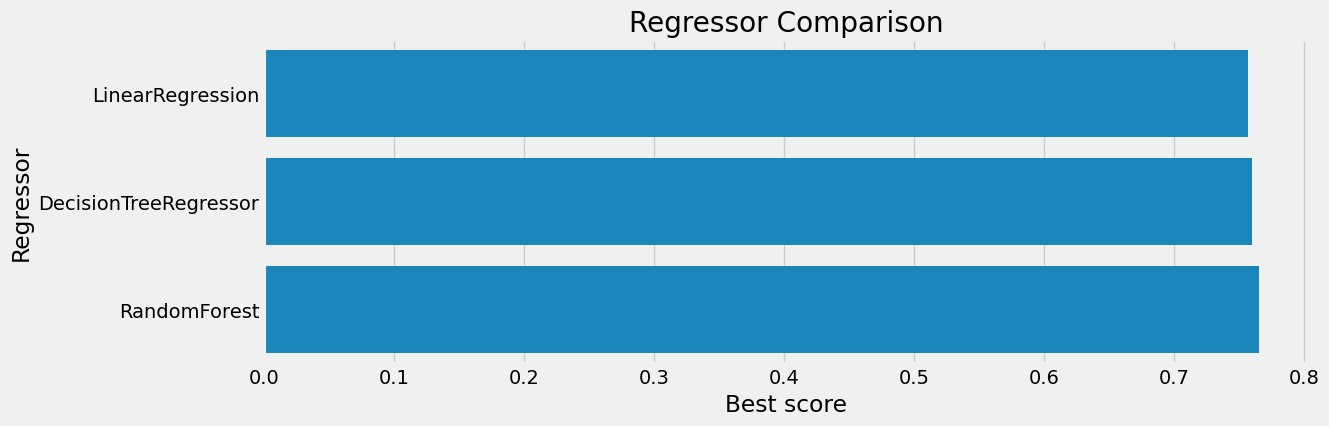

In [ ]:
# visualizing results
plt.figure(figsize=(12,4))
plt.xlabel('Best score')
plt.title('Regressor Comparison')

sns.barplot(x='Best Score', y='Regressor', data=summary)

###**Conclusion**

* This is a basic analysis of a transactions dataset with a model that predicts sales. R2 score is of more than 0.7 which is **good.**

* It emphasizes how predictive modeling can transform sales strategies in the banking sector. By building models to forecast **sales performance**, participants can better anticipate market trends and customer needs, which ultimately helps in achieving revenue goals **more effectively**. Accurate predictions provide a competitive edge, enabling more precise and data-driven planning.

* Understanding the main drivers of sales performance empowers **sales teams** to focus on the most impactful areas. This targeted approach to sales strategy allows banks to allocate resources **more efficiently, boost customer acquisition, and optimize revenue growth**. Identifying these drivers is key to forming actionable strategies that increase sales success in a competitive environment.

* The model interpretation equips participants with the skills to make sense of **complex data**. This clarity allows for informed decision-making that’s both insightful and practical for real-world applications. The project enables banking professionals to leverage data analytics to refine sales tactics and drive sustainable growth.








####**Key points for the project**

**1. Predict Sales Performance:** This project enables participants to forecast sales figures for banking products. Accurate predictions help teams plan better and make informed decisions to meet sales targets.

**2. Optimize Sales Strategies**: Using predictive models, participants can analyze which strategies work best. This helps in tweaking sales approaches to improve overall performance and reach revenue goals more effectively.

**3. Use of Key Algorithms:** Linear Regression and Random Forest are the main tools for modeling in this project. These algorithms help in understanding patterns in sales data and making accurate predictions.

**4. Identify Sales Drivers:** Participants will learn to find out what factors affect sales the most. Knowing key drivers helps sales teams focus on areas that can increase their sales success.

**5. Improve Model Interpretation:** Understanding model results is crucial for taking action based on predictions. The project teaches how to interpret models, making insights easy to understand and apply in real-world sales settings.












